<a href="https://colab.research.google.com/github/18K41A0256/NNDL/blob/main/Assignment%2004.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
import math

In [3]:
data = pd.read_excel("/content/slr09.xls")
data.describe()

*** No CODEPAGE record, no encoding_override: will use 'ascii'


,X,Y
count,34.000000,34.000000
mean,7.661765,142.794118
std,0.501522,55.787356
min,6.700000,35.000000
25%,7.300000,107.000000
50%,7.600000,147.000000
75%,8.000000,186.500000
max,8.800000,262.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


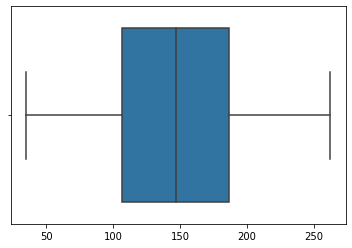

In [4]:
sns.boxplot(list(data.iloc[:,1]))

In [5]:
z = np.abs(stats.zscore(data.iloc[:,1]))

threshold = 3
print(np.where(z > 3))

(array([], dtype=int64),)


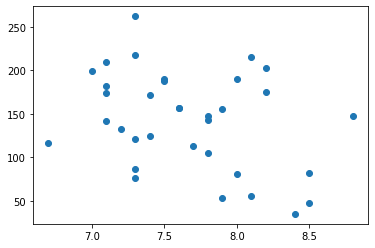

In [6]:
plt.scatter(data.iloc[:,0],data.iloc[:,1])

In [7]:
x = minmax_scale(list(data.iloc[:,0]))
y = minmax_scale(list(data.iloc[:,1]))

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

27
27
7
7


In [8]:
m = 1
c = -1

learning_rate = 0.01
epochs = 100
number_of_samples = len(x_train)
error_list = []

def gradientm(y,x,m,c):
    return -1*(y-m*x-c)*x

def gradientc(y,x,m,c):
    return -1*(y-m*x-c)

def error(x,y,m,c):
  number_of_samples = len(x)
  sum = 0
  for i in range(number_of_samples):
    sum = sum + math.pow((y[i] - m*x[i] - c), 2)
  error_value = 1*0.5*(1/number_of_samples)*sum
  return error_value

for i in range(epochs):
    for j in range(number_of_samples):        
        deltam = -1*learning_rate*gradientm(y[j],x[j],m,c)
        deltac = -1*learning_rate*gradientc(y[j],x[j],m,c)
        
        m = m + deltam
        c = c + deltac

    err = error(x,y,m,c)
    error_list.append(err)

print("optimal value of m and c using SGD: ",m , c)

optimal value of m and c using SGD:  0.15519898999810028 0.40724556095157977


Text(0.5, 1.0, 'error graph in case of SGD')

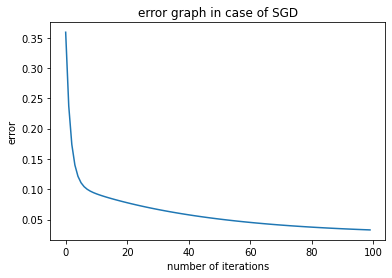

In [9]:
x1 = range(epochs)
y1 = error_list

plt.plot(x1,y1)
plt.xlabel("number of iterations")
plt.ylabel("error")
plt.title("error graph in case of SGD")

In [10]:
train_error = error(x_train,y_train,m,c)
test_error = error(x_test,y_test,m,c)

print("train error : ",train_error)
print("test error : ",test_error)

train error :  0.03217922798270141
test error :  0.036092585666970996


Text(0.5, 1.0, 'line which is generated after training and actual values')

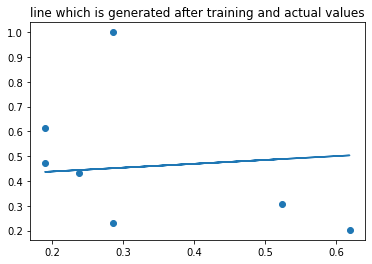

In [11]:
x2 = x_test
y2 = [m*i+c for i in x2]

plt.plot(x2,y2)
plt.scatter(x_test,y_test)
plt.title("line which is generated after training and actual values")

In [12]:
x_max = 8.8
y_max = 262

x_min = 6.7
y_min = 35

actual_x_value = float(input("enter the PH value : "))
scaled_x_value = (actual_x_value - x_min)/(x_max - x_min)

scaled_y_value = m*scaled_x_value + c
actual_y_value = scaled_y_value * (y_max - y_min) + y_min

print("predicted value : ",actual_y_value)

enter the PH value : 8
predicted value :  149.25389564478928
